In [29]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

import pandas_ta as ta

# Disable the use of GPUs for Mac with M1 or M2 processsors as that could slow down the deep learning process
tf.config.set_visible_devices([], 'GPU')

In [30]:
ticker = 'NVDA'

stock_data_period = '4y'
stock_data_interval = '1d'

In [31]:
# Get live stock data
df = pd.DataFrame()
df = df.ta.ticker(ticker, period = stock_data_period, interval = stock_data_interval)
df.drop(columns=['Dividends', 'Stock Splits'],inplace=True,axis=1)
df

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-01,70.467028,72.426097,70.080174,71.756538,62206000
2018-10-02,71.481256,72.599664,70.819137,71.042328,38396400
2018-10-03,71.746601,71.820993,70.062790,71.104324,32055200
2018-10-04,70.742275,70.985302,68.488105,69.259338,39122000
2018-10-05,69.011337,69.633770,66.345514,66.920830,42663600
...,...,...,...,...,...
2022-09-26,124.910004,126.589996,122.139999,122.279999,54734300
2022-09-27,125.070000,127.360001,122.580002,124.129997,55385400
2022-09-28,124.099998,128.229996,123.540001,127.360001,54241400


<AxesSubplot:xlabel='Date'>

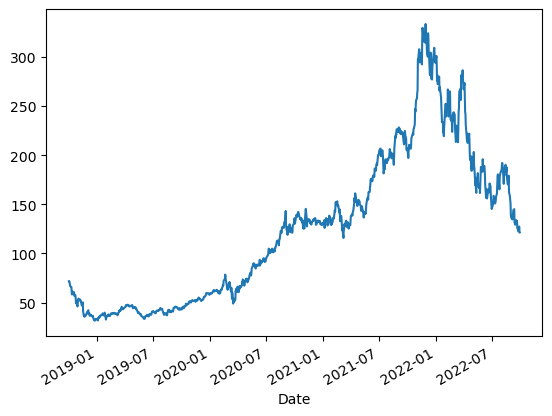

In [32]:
#Plot the True Adj Close Value
df['Close'].plot()

In [33]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [34]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2018-10-01,0.128724,0.127931,0.135491,0.217172
2018-10-02,0.132066,0.128484,0.138047,0.118526
2018-10-03,0.132940,0.126003,0.135431,0.092254
2018-10-04,0.129631,0.123341,0.129986,0.121532
2018-10-05,0.123928,0.119036,0.122578,0.136206


In [48]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

X_test_data = X_test.copy()
X_test_data

,Open,High,Low,Volume
Date,,,,
2022-05-23,0.432479,0.435766,0.452313,0.224559
2022-05-24,0.440251,0.425641,0.438524,0.203288
2022-05-25,0.424114,0.442006,0.446127,0.283077
2022-05-26,0.424641,0.473240,0.446887,0.372338
2022-05-27,0.495444,0.498360,0.518702,0.265364
...,...,...,...,...
2022-09-26,0.308107,0.300467,0.315499,0.186216
2022-09-27,0.308634,0.302920,0.317021,0.188914
2022-09-28,0.305438,0.305691,0.320340,0.184174


In [36]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

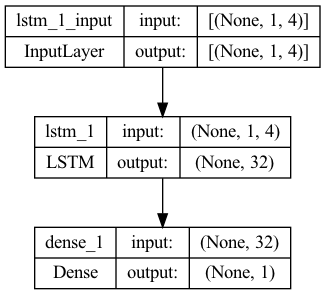

In [37]:
# Build the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [38]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
115/115 [==============================] - 1s 843us/step - loss: 20715.8906
Epoch 2/100
115/115 [==============================] - 0s 670us/step - loss: 20386.9785
Epoch 3/100
115/115 [==============================] - 0s 675us/step - loss: 19817.8184
Epoch 4/100
115/115 [==============================] - 0s 672us/step - loss: 18928.3379
Epoch 5/100
115/115 [==============================] - 0s 674us/step - loss: 17715.3164
Epoch 6/100
115/115 [==============================] - 0s 681us/step - loss: 16235.0498
Epoch 7/100
115/115 [==============================] - 0s 680us/step - loss: 14575.2676
Epoch 8/100
115/115 [==============================] - 0s 675us/step - loss: 12829.2129
Epoch 9/100
115/115 [==============================] - 0s 675us/step - loss: 11081.1064
Epoch 10/100
115/115 [==============================] - 0s 671us/step - loss: 9400.2812
Epoch 11/100
115/115 [==============================] - 0s 671us/step - loss: 7839.6812
Epoch 12/100
115/115 [==========

In [39]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

3/3 [==============================] - 0s 934us/step


In [40]:
X_test

array([[[0.43247863, 0.43576596, 0.45231323, 0.2245588 ]],

       [[0.44025057, 0.42564141, 0.43852401, 0.20328847]],

       [[0.42411394, 0.44200632, 0.44612713, 0.28307737]],

       [[0.42464081, 0.47323964, 0.44688739, 0.37233784]],

       [[0.49544439, 0.4983601 , 0.51870217, 0.26536432]],

       [[0.52159235, 0.50851657, 0.52734209, 0.23458969]],

       [[0.51316173, 0.50383627, 0.51946245, 0.18504386]],

       [[0.49893513, 0.52185675, 0.52208895, 0.22819107]],

       [[0.52495137, 0.5127192 , 0.53328629, 0.20752646]],

       [[0.52682846, 0.51287835, 0.53473778, 0.13445313]],

       [[0.50486288, 0.50214884, 0.52174339, 0.12057702]],

       [[0.5157625 , 0.50800884, 0.53387098, 0.10994496]],

       [[0.50528793, 0.50014312, 0.51679496, 0.12333633]],

       [[0.47626881, 0.46078265, 0.47628259, 0.15220306]],

       [[0.4235667 , 0.41667728, 0.43262467, 0.20975297]],

       [[0.41470613, 0.40884341, 0.42591868, 0.15403929]],

       [[0.42669584, 0.43438308, 0.44368

In [27]:
predictions_df = X_test.copy()
predictions_df ['Close']= y_test
predictions_df ['Predicted Close'] = y_pred
predictions_df.drop(columns=['Open', 'High', 'Low', 'Volume'], inplace=True)
predictions_df.head()

,Close,Predicted Close
Date,,
2022-05-23,168.894089,167.019501
2022-05-24,161.457870,165.079666
2022-05-25,169.663712,166.768463
2022-05-26,178.419235,171.044769
2022-05-27,188.014374,187.051834


<AxesSubplot:xlabel='Date'>

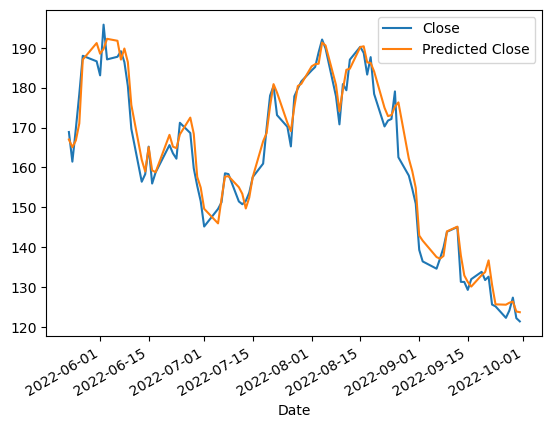

In [28]:
predictions_df.plot()